In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Parameters
IMG_HEIGHT, IMG_WIDTH, CHANNELS = 512, 512, 3
BATCH_SIZE = 32
EPOCHS = 500
DATA_DIR1 = 'd1'  # Update this to your images folder
DATA_DIR = 'd'
# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
    return np.array(images)

# Load and preprocess dataset
y_images = load_images_from_folder(DATA_DIR)
x_images = load_images_from_folder(DATA_DIR1)
# Split the dataset into training and validation sets
#train_images, val_images = train_test_split(x_images, test_size=0.2, random_state=42)

# Define the U-Net model
def create_unet_model(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)):
    inputs = layers.Input(shape=input_shape)
   
    # Encoder
    x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(inputs)
    #x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Additional downsampling layers can be added
    x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Bottleneck
    x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
    
    # Decoder
    x = layers.Conv2DTranspose(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.UpSampling2D(size=(2, 2))(x)
    
    x = layers.Conv2DTranspose(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.UpSampling2D(size=(2, 2))(x)

    outputs = layers.Conv2D(3, kernel_size=3, padding='same', activation='sigmoid')(x)
    
    model = keras.Model(inputs, outputs)
    return model

# Create and compile the model
model = create_unet_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_images, y_images, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE)
#,validation_data=(val_images, val_images)
# Save the model
model.save('reddot.h5')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 512, 512, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 128, 128, 128)  │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 256, 256, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 512, 512, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 512, 512, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741,379 (2.83 MB)

 Trainable params: 741,379 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 0.0620
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0587
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0586
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0560
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0562
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0548
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step - loss: 0.0523
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step - loss: 0.0486
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step - loss: 0.0412
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 46s 46s/step - loss: 0.0349
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - loss: 0.0665
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - loss: 0.0291
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step - loss: 0.0429
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step - loss: 0.0350
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - loss: 0.0203
Epoch 16/500
1/1 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


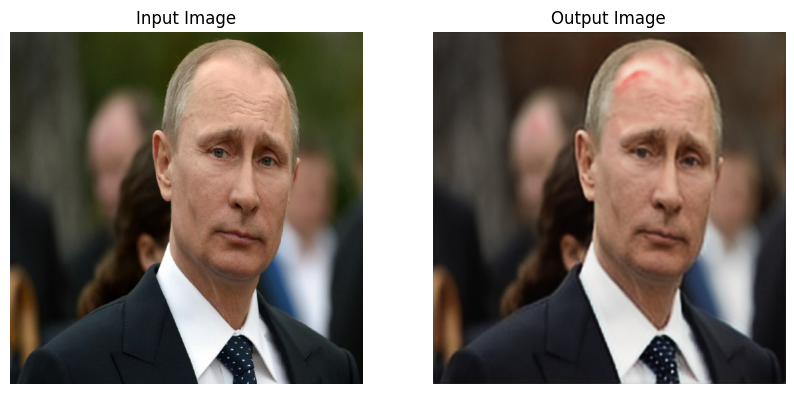

In [35]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('reddot.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(512, 512))  # Resize to model input size
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

# Function to plot input and output images
def plot_input_output(input_image, output_image):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Input Image')
    plt.imshow(input_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Output Image')
    plt.imshow(output_image)
    plt.axis('off')

    plt.show()

# Path to the input image
image_path = 'download.jpg'  # Update this to your input image path

# Preprocess the input image
input_image = preprocess_image(image_path)

# Predict the output
output_image = model.predict(input_image)

# Squeeze the output to remove the batch dimension
output_image = np.squeeze(output_image)

# Plot the input and output images
plot_input_output(input_image[0], output_image)


In [17]:
import matplotlib.pyplot as plt

def plot_images(images, titles=None, ncols=4):
    n_images = len(images)
    n_rows = (n_images + ncols - 1) // ncols  # Calculate rows needed
    plt.figure(figsize=(ncols * 3, n_rows * 3))

    for i in range(n_images):
        plt.subplot(n_rows, ncols, i + 1)
        plt.imshow(images[i])
        if titles is not None:
            plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot a few images from training and validation sets
plot_images(train_images[:8], titles=[f'Train {i}' for i in range(8)])
plot_images(val_images[:8], titles=[f'Validation {i}' for i in range(8)])


NameError: name 'train_images' is not defined